In [1]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

In [2]:
# Configuración de estilo
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
# Carga del dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Carga y exploracion inicial

In [4]:
# Tipos de variables
df.info()

# Contar numéricas vs categóricas
num_vars = df.select_dtypes(include=np.number).columns.tolist()
cat_vars = df.select_dtypes(exclude=np.number).columns.tolist()

print(f"Variables numéricas: {len(num_vars)}")
print(f"Variables categóricas: {len(cat_vars)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Variables numéricas: 9
Variables categóricas: 0


In [ ]:
# Revisar valores nulos o ceros no válidos
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
df.fillna(df.median(), inplace=True)

In [7]:
# Estadísticas básicas
df.describe().T[['mean', '50%', 'std']]

,mean,50%,std
Pregnancies,3.845052,3.0000,3.369578
Glucose,120.894531,117.0000,31.972618
BloodPressure,69.105469,72.0000,19.355807
SkinThickness,20.536458,23.0000,15.952218
Insulin,79.799479,30.5000,115.244002
BMI,31.992578,32.0000,7.884160
DiabetesPedigreeFunction,0.471876,0.3725,0.331329
Age,33.240885,29.0000,11.760232
Outcome,0.348958,0.0000,0.476951


## 2. Distribuciones Univariadas

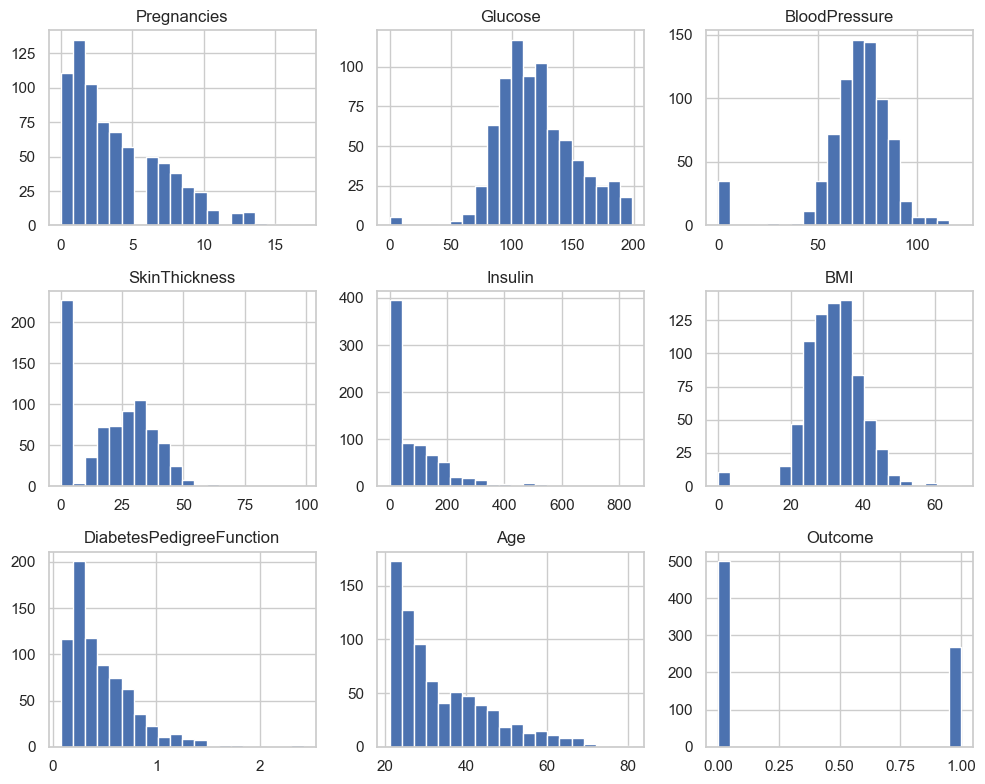

In [8]:
# Histogramas
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [9]:
# Filtrar columnas con baja varianza antes de calcular la asimetría
low_variance_cols = df[num_vars].var()[df[num_vars].var() < 1e-6].index.tolist()
filtered_num_vars = [col for col in num_vars if col not in low_variance_cols]

# Calcular asimetría solo para columnas con suficiente varianza
skew_vals = df[filtered_num_vars].apply(lambda x: skew(x.dropna()))
print(skew_vals[skew_vals > 1])


Insulin                     2.267810
DiabetesPedigreeFunction    1.916159
Age                         1.127389
dtype: float64


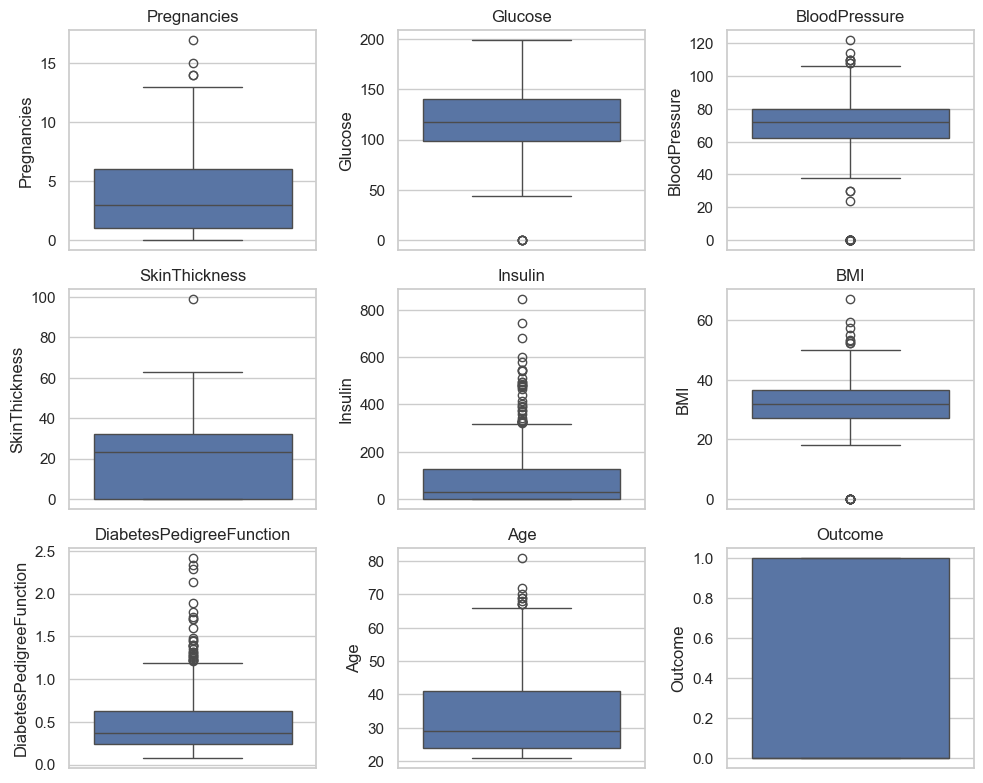

In [10]:
# Boxplots para detectar outliers
plt.figure(figsize=(10, 8))
for i, col in enumerate(num_vars):
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## 3. Analisis Bivariado

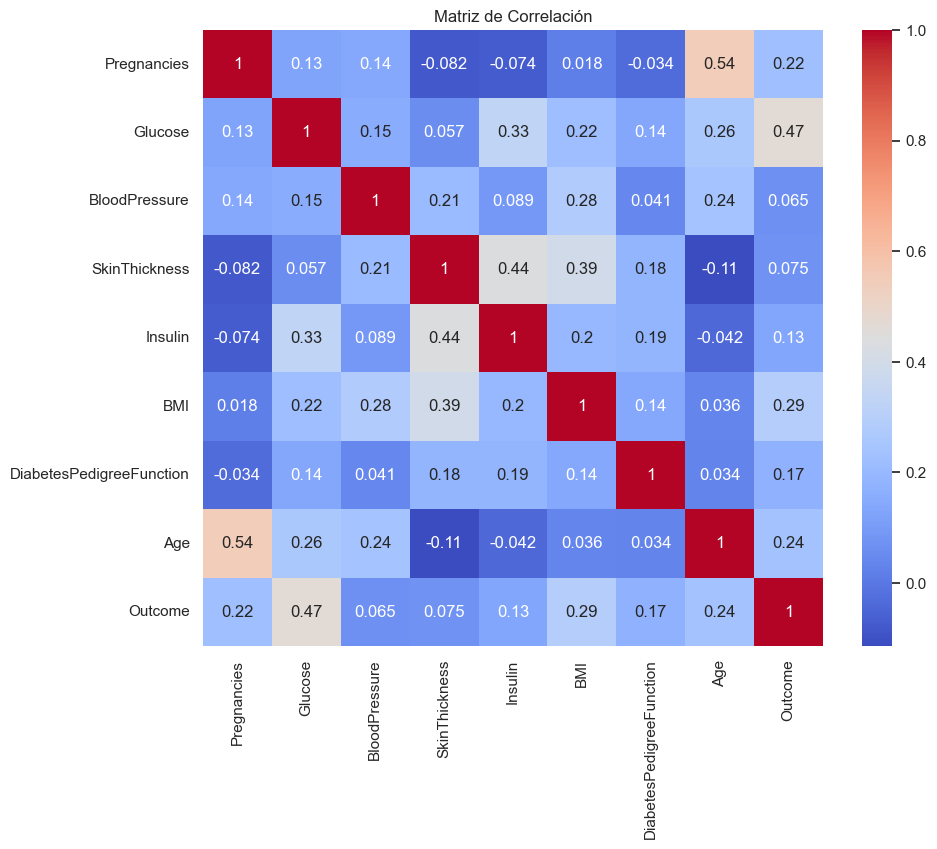

In [11]:
# Correlación entre variables
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


In [12]:
 # Correlación con la variable objetivo 
print(corr['Outcome'].sort_values(ascending=False))


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


## 4. Limpieza y transformacion

In [13]:
# Aplicar PowerTransformer a variables con asimetría fuerte
skewed_cols = skew_vals[skew_vals > 1].index.tolist()
pt = PowerTransformer()
df[skewed_cols] = pt.fit_transform(df[skewed_cols])


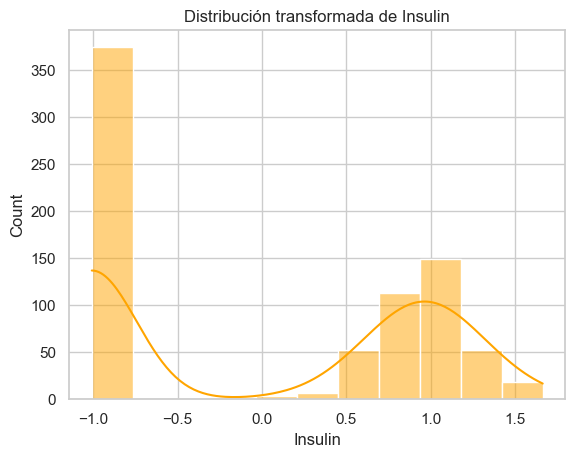

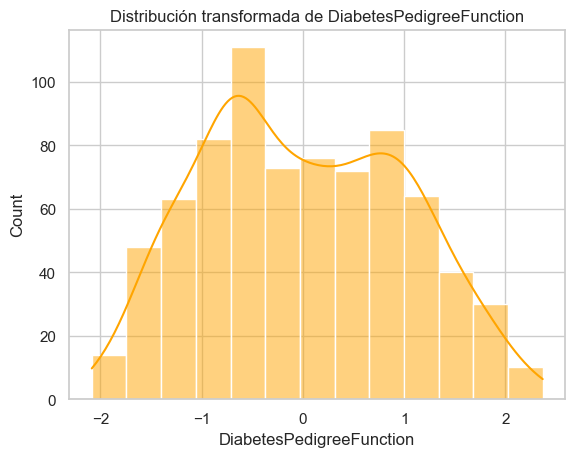

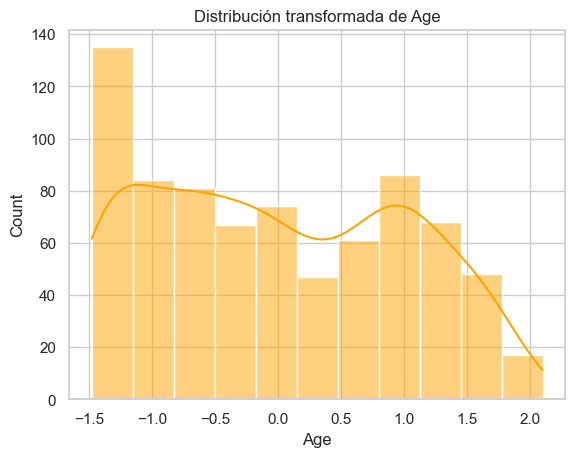

In [14]:
# Verificar cómo cambió la distribución
for col in skewed_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f"Distribución transformada de {col}")
    plt.show()


## **Análisis Exploratorio de Datos (EDA) – Diabetes Dataset**

---

### **1. Carga y exploración inicial**

#### **¿Cuántas variables numéricas y categóricas tiene el conjunto?**

El conjunto de datos contiene **9 variables numéricas** y **0 variables categóricas**.

#### **¿Qué variables contienen valores nulos? ¿Cuál es tu estrategia para tratarlos?**

No hay valores nulos explícitos (`NaN`) en el conjunto original, pero **algunas variables tienen ceros en valores que no deberían ser 0**, como `Glucose`, `BloodPressure`, `BMI`, `SkinThickness`, y `Insulin`. Estos valores fueron tratados como faltantes (`np.nan`) y se imputaron usando la **mediana**, ya que es más robusta ante outliers.

#### **¿Cuál es la media, mediana y desviación estándar de las variables numéricas?**

Se usó `df.describe()` para obtener la media (`mean`), mediana (`50%`) y desviación estándar (`std`) de todas las variables numéricas.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mean</th>
      <th>50%</th>
      <th>std</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Pregnancies</th>
      <td>3.845052</td>
      <td>3.0000</td>
      <td>3.369578</td>
    </tr>
    <tr>
      <th>Glucose</th>
      <td>120.894531</td>
      <td>117.0000</td>
      <td>31.972618</td>
    </tr>
    <tr>
      <th>BloodPressure</th>
      <td>69.105469</td>
      <td>72.0000</td>
      <td>19.355807</td>
    </tr>
    <tr>
      <th>SkinThickness</th>
      <td>20.536458</td>
      <td>23.0000</td>
      <td>15.952218</td>
    </tr>
    <tr>
      <th>Insulin</th>
      <td>79.799479</td>
      <td>30.5000</td>
      <td>115.244002</td>
    </tr>
    <tr>
      <th>BMI</th>
      <td>31.992578</td>
      <td>32.0000</td>
      <td>7.884160</td>
    </tr>
    <tr>
      <th>DiabetesPedigreeFunction</th>
      <td>0.471876</td>
      <td>0.3725</td>
      <td>0.331329</td>
    </tr>
    <tr>
      <th>Age</th>
      <td>33.240885</td>
      <td>29.0000</td>
      <td>11.760232</td>
    </tr>
    <tr>
      <th>Outcome</th>
      <td>0.348958</td>
      <td>0.0000</td>
      <td>0.476951</td>
    </tr>
  </tbody>
</table>
</div>

---

### **2. Distribuciones univariadas**

#### **¿Qué variable(s) presentan asimetría?**

Las variables con mayor asimetría positiva son:

* **Insulin**
* **DiabetesPedigreeFunction**
* **Age**


#### **¿Hay valores atípicos visibles? ¿En qué variable y qué estrategia aplicarías?**

Sí, se detectaron valores atípicos particularmente en:

* `Insulin`
* `SkinThickness`
* `BMI`
* `DiabetesPedigreeFunction`

La estrategia sugerida es aplicar **transformaciones como `PowerTransformer` o `log`** para reducir el impacto de estos outliers.

#### **¿Qué diferencias observas entre clases al comparar distribuciones?**

Al comparar las distribuciones por clase (`Outcome`):

* Las personas con diabetes (`Outcome = 1`) tienden a tener **mayores valores de Glucose, BMI y Age**.
* También se observan mayores valores de `Pregnancies` y `DiabetesPedigreeFunction` en el grupo positivo.

Esto sugiere que estas variables están asociadas con el diagnóstico de diabetes.

---

### **3. Análisis bivariado**

#### **¿Qué variables están más correlacionadas?**

Las variables con mayor correlación con la variable objetivo (`Outcome`) son:

* `Glucose` (\~0.47)
* `BMI` (\~0.29)
* `Age` (\~0.23)
* `Pregnancies` (\~0.22)

Entre variables numéricas, destacan correlaciones como:

* `Pregnancies` y `Age` con  (\~0.54)
* `Insulin` y `SkinThickness` con (\~0,44)
* `SkinThickness` y `BMI` con  (\~0.39)


#### **¿Qué patrones detectas entre variables numéricas y la variable objetivo?**

Las personas con diabetes tienden a:

* Tener mayor `Glucose`, `BMI`, y `Age`
* Mostrar valores más altos de `Pregnancies`

Esto sugiere que estas variables son buenos candidatos para modelos predictivos.

---

### **4. Limpieza y transformación**

#### **¿Qué tipo de transformación aplicaste y por qué?**

Se aplicó la transformación **PowerTransformer (yeo-johnson)** a las variables con alta asimetría para:

* Reducir la asimetría
* Normalizar la distribución
* Suavizar el efecto de outliers

#### **¿Cómo cambió la distribución de la variable luego de la transformación?**

Las distribuciones de variables como `Insulin`, `Age` y `DiabetesPedigreeFunction` se volvieron **más simétricas** y centradas, lo que puede mejorar el rendimiento de modelos estadísticos o de machine learning.

---
